# Joe's code

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import linregress
import scipy.stats as st

tornado_raw = pd.DataFrame()
directory = "tornado_cleaned_files"
for entry in os.scandir(directory):
    if entry.path.endswith(".csv"):
        data = pd.read_csv(entry.path)
        tornado_raw = tornado_raw.append(data)

tornado_cleaned = tornado_raw[(tornado_raw['EVENT_TYPE'] == 'Tornado')]
#                               & ((tornado_raw["TOR_F_SCALE"] == "EF3") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "EF4") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "EF5") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "F3") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "F4") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "F5"))]
tornado_count = pd.DataFrame(tornado_cleaned.groupby('YEAR')['EVENT_TYPE'].count())
tornado_count = tornado_count.rename(columns={'EVENT_TYPE':'Severe_Tornado_Count'})
tornado_count.reset_index(inplace=True)

In [3]:
temp_directory = "temperature_average"
temp_data = pd.read_csv(f"{temp_directory}/average_temp.csv")
temp_data.rename(columns={'Year':'YEAR'}, inplace = True)

In [4]:
tornado_count = tornado_count.merge(temp_data,on='YEAR',how="inner")

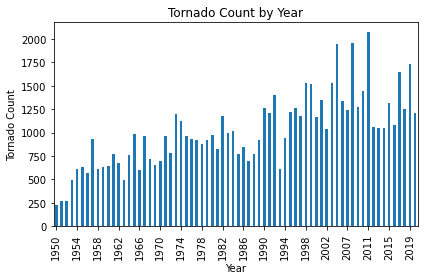

In [5]:
tornado_count.plot('YEAR','Severe_Tornado_Count',kind="bar",legend=False)
plt.xticks(rotation='vertical')
plt.title('Tornado Count by Year')
plt.ylabel('Tornado Count')
plt.xlabel('Year')
plt.locator_params(axis='x', nbins=20)
plt.tight_layout()
plt.savefig("tornado_plots_images/tornado_count_bar.png")
plt.show()

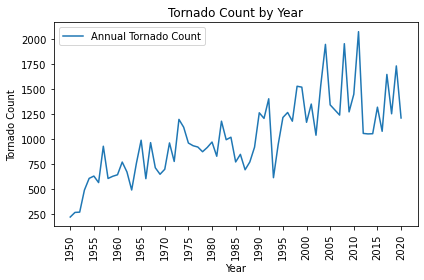

In [6]:
tornado_count.plot('YEAR','Severe_Tornado_Count',kind="line",label='Annual Tornado Count')
plt.xticks(rotation='vertical')
plt.title('Tornado Count by Year')
plt.ylabel('Tornado Count')
plt.xlabel('Year')
plt.locator_params(axis='x', nbins=20)
plt.tight_layout()
plt.savefig("tornado_plots_images/tornado_count_line.png")
plt.show()

r^2 correlation between US average temp and tornado count: 0.23542287425262662


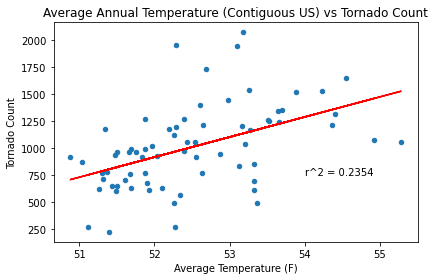

In [7]:
tornado_count.plot('Average_Temp','Severe_Tornado_Count',kind = "scatter")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Tornado Count')

plt.title('Average Annual Temperature (Contiguous US) vs Tornado Count')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tornado_count['Average_Temp'], tornado_count['Severe_Tornado_Count'])
print(f'r^2 correlation between US average temp and tornado count: {rvalue**2}')
regress_values = tornado_count['Average_Temp'] * slope + intercept
plt.plot(tornado_count['Average_Temp'],regress_values,color='red')
plt.text(54,750,f"r^2 = {round((rvalue**2),4)}")
plt.tight_layout()
plt.savefig("tornado_plots_images/temp_vs_tornado_count.png")
plt.show()

In [8]:
predicted_temp_2022 = 53.71
predicted_tornadoes_2022 = predicted_temp_2022*slope+intercept
print(f"The number of tornadoes in the US predicted for 2022 is {round(predicted_tornadoes_2022,0)}")

The number of tornadoes in the US predicted for 2022 is 1235.0


# John's code

In [9]:
# Data file paths
temp_path = "temperature_average/average_temp.csv"
weather_path = "tropical_storm_file/tropical storms.csv"

# Store data into dataframes
temp = pd.read_csv(temp_path)
weather = pd.read_csv(weather_path)

In [10]:
# Filter out years in temperature dataframe that don't align with weather dataframe
temp = temp[temp["Year"] >= 1958]

# Display temperature dataframe
temp

,Year,Average_Temp
8,1958,51.93
9,1959,52.10
10,1960,51.44
11,1961,51.87
12,1962,51.90
...,...,...
66,2016,54.92
67,2017,54.55
68,2018,53.52
69,2019,52.68


In [11]:
# Clean weather dataframe
weather.pop("li")

# Display weather dataframe
weather

,StormName,Year,Basin
0,Alberto (Atlantic),1994,Atlantic
1,Beryl (Atlantic),1994,Atlantic
2,Chris (Atlantic),1994,Atlantic
3,Debby (Atlantic),1994,Atlantic
4,Ernesto (Atlantic),1994,Atlantic
...,...,...,...
1328,Tropical Storm Lowell (Pacific),2020,Pacific
1329,Hurricane Marie (Pacific),2020,Pacific
1330,Tropical Storm Norbert (Pacific),2020,Pacific
1331,Tropical Storm Polo (Pacific),2020,Pacific


In [12]:
# Group dataframe by year
weather_group = weather.groupby(["Year"])

# Create series to store the storm name
trop_storm = weather_group["StormName"]

# Store the number of storms per year into series
trop_storm_count = trop_storm.count()

# Display series
trop_storm_count

Year
1958    10
1959    10
1960     7
1961    10
1962     5
        ..
2016    39
2017    38
2018    42
2019    38
2020    34
Name: StormName, Length: 63, dtype: int64

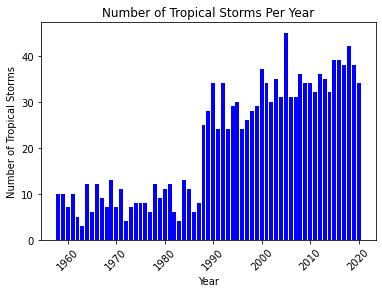

In [13]:
# Create x and y axis for bar chart
x_axis = weather["Year"].unique()
x_axis.sort()
y_axis = trop_storm_count

# Create bar plot to display number of tropical storms per year
plt.bar(x_axis, y_axis, color='b', align="center")
plt.title("Number of Tropical Storms Per Year")
plt.xlabel("Year")
plt.xticks(rotation= 45)
plt.ylabel("Number of Tropical Storms")
plt.show()

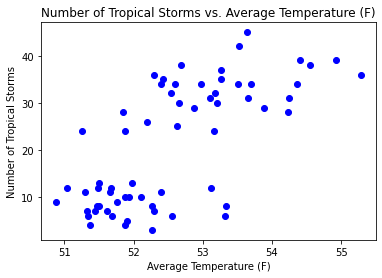

In [14]:
# Create x and y axis for scatter chart
x_axis = temp["Average_Temp"]
y_axis = trop_storm_count

# Create scatter chart to display number of tropical storms against average temp.
plt.scatter(x_axis, y_axis, color='b')
plt.title("Number of Tropical Storms vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Tropical Storms")
plt.show()

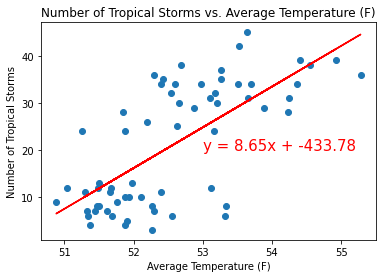

The r^2 value is 0.4885981875958562


In [15]:
# Plot the regression line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (53,20), fontsize=15, color="red")

plt.title("Number of Tropical Storms vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Tropical Storms")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [16]:
# Using the regression line and predicted temperature for 2022 (53.71), predict the number of hurricanes in 2022
hurricanes_2022 = (8.65 * 53.71) - 433.78
print(f'The predicted number of hurricanes that will occur in 2022 are {round(hurricanes_2022, 0)}')

The predicted number of hurricanes that will occur in 2022 are 31.0


# Sara's code

In [17]:
#  Read cvs file

# Wild fire year wise count dataset
wildfire_count_1983_2020 = pd.read_csv("wildfire_source_data/wildfire_count_1983_2020.csv")

# Average temperature from 1991 - 2020 for contiguous US 
average_temp_1983_2020 = pd.read_csv("wildfire_source_data/average_temp_1983_2020.txt")
average_temp_1983_2020.head()

,Year,Average_Temp
0,1983,51.88
1,1984,51.97
2,1985,51.30
3,1986,53.32
4,1987,53.33


In [18]:
# Data cleansing 

# sorting the average_temp "Year" by decending order inorder to be able to merge with wild fire count  
sorted_average_temp = average_temp_1983_2020.sort_values(by="Year", ascending=False)
average_temp_final = sorted_average_temp.reset_index(drop = True)

# formatting the "," from Fire and Acres column 
fires = wildfire_count_1983_2020['Fires'].str.replace(',', '').astype(int)
acres = wildfire_count_1983_2020['Acres'].str.replace(',', '').astype(int)
year = wildfire_count_1983_2020['Year']

# creating a new dataframe after removing the "," from wildfire_count_1983_2020 dataset
wild_fire_count_df = pd.DataFrame({"WildFire_Count":fires,
                                   "Acres_Burned":acres,
                                   "Year" : year})

# Merge two dataframes using an inner join
wildfire_merged_df = pd.merge(wild_fire_count_df, average_temp_final, how ="inner", on="Year")
wildfire_merged_df.head()

,WildFire_Count,Acres_Burned,Year,Average_Temp
0,58950,10122336,2020,54.36
1,50477,4664364,2019,52.68
2,58083,8767492,2018,53.52
3,71499,10026086,2017,54.55
4,67743,5509995,2016,54.92


Text(0, 0.5, 'Number of wild fires')

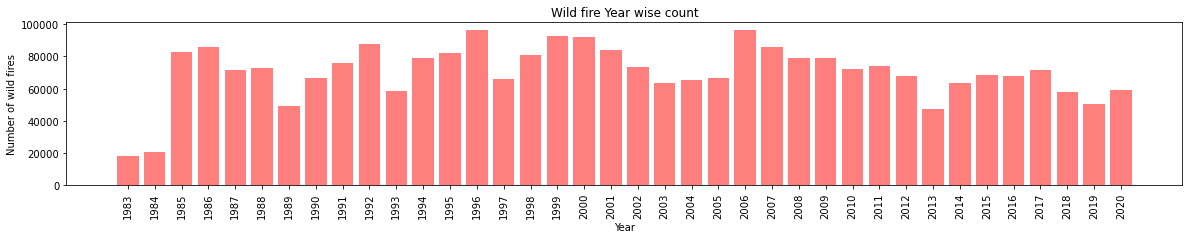

In [19]:
# Generating bar chart using matplotlib
x_axis = wildfire_merged_df['Year'] 
y_axis = wildfire_merged_df['WildFire_Count']

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(x_axis, rotation="vertical")

# Set a Title and labels
plt.title("Wild fire Year wise count")
plt.xlabel("Year")
plt.ylabel("Number of wild fires")

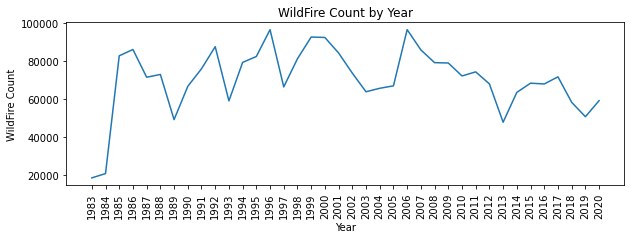

In [20]:
# Generating line plot using matplotlib
x_axis = wildfire_merged_df['Year'] 
y_axis = wildfire_merged_df['WildFire_Count']
plt.figure(figsize=(10,3))
plt.plot(x_axis,y_axis)
plt.xticks(x_axis,rotation='vertical')
plt.title('WildFire Count by Year')
plt.ylabel('WildFire Count')
plt.xlabel('Year')
# plt.savefig("../output_data/wild_fire_lineplot.png")
plt.show()

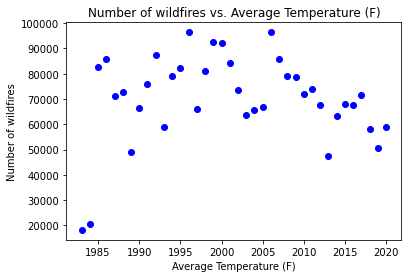

In [21]:
# Create x and y axis for scatter chart
x_axis = wildfire_merged_df['Year'] 
y_axis = wildfire_merged_df['WildFire_Count']

# Create scatter chart to display number of wildfire vs. average temp.
plt.scatter(x_axis, y_axis, color='b')
plt.title("Number of wildfires vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of wildfires")
plt.show()

y = 1872094.81x + -94199039.06
The r-squared is: 0.37934974758095236


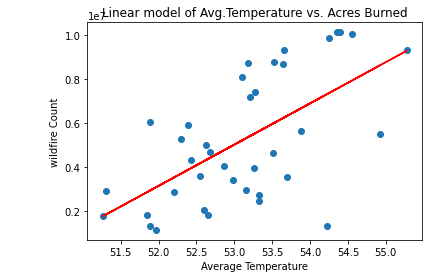

The correlation coefficient between wildFire Count and Acres burned value is 0.62


In [22]:
# Generate a scatter plot of WildFire count Vs.Average Temperature
# Add the linear regression equation and line to plot 

# x and y axis of the scatter plot
x_values = wildfire_merged_df['Average_Temp']
y_values = wildfire_merged_df['Acres_Burned']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=14,color="red")
plt.title("Linear model of Avg.Temperature vs. Acres Burned")
plt.xlabel('Average Temperature')
plt.ylabel('wildfire Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between wildFire Count and Acres burned value is {corr_coefficient}')


In [ ]:
# Using the regression line and predicted temperature for 2022 (53.71), predict the number of wildfire in 2022
# The line equation is y = 1872094.81x + -94199039.06
wildfire_2022 = (1872094.81 * 53.71) -94199039.06
print(f'The number of acresburn predictd for the year 2022 is {round(wildfire_2022, 0)}')

y = 4789.7x + -184075.08
The r-squared is: 0.0704837809277045


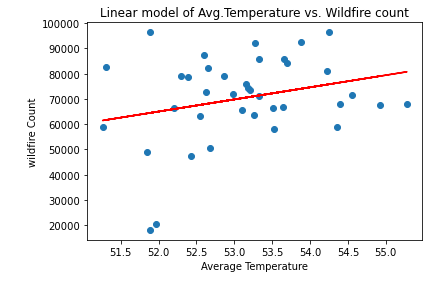

The correlation coefficient between Average Temperature and Wildfire Count value is 0.27


In [23]:
# Generate a scatter plot of WildFire count Vs.Average Temperature
# Add the linear regression equation and line to plot 

# x and y axis of the scatter plot
x_values = wildfire_merged_df['Average_Temp']
y_values = wildfire_merged_df['WildFire_Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=15,color="red")
plt.title("Linear model of Avg.Temperature vs. Wildfire count")
plt.xlabel('Average Temperature')
plt.ylabel('wildfire Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Average Temperature and Wildfire Count value is {corr_coefficient}')

In [24]:
# Using the regression line and predicted temperature for 2022 (53.71), predict the number of wildfire in 2022
# The line equation is y = 4789.7x + -184075.08
wildfire_2022 = (4789.7 * 53.71) -184075.08
print(f'The number of wildfires predicted for the year 2022 is: {round(wildfire_2022, 0)}')

The number of wildfires predicted for the year 2022 is: 73180.0


# Guy's code